In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')

import sys
import os
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../Codes/')
from geometryGEE import *
from cityClass import *
from myUtils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
dPath = '/home/d1-user/Research/JRC/Thermopolis/Data/'
ub = dPath+'urban_boundaries/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2/GHS_STAT_UCDB2015MT_GLOBE_R2019A/'
ub = ub+'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.gpkg'

In [3]:
gdf = gpd.read_file(ub)
gdf = gdf[['AREA', 'geometry', 'UC_NM_MN', 'E_KG_NM_LST', 'P15']].sort_values(['AREA'], ascending=False).reset_index(drop=True)
gdf = gdf.to_crs("ESRI:54009")
crs = gdf.crs

In [4]:
value_mapping = {'Af':'Tropical', 
                 'Am': 'Tropical', 
                 'Aw': 'Tropical',
                 'As': 'Tropical',
                 'BWh':'Arid',
                 'BWk':'Arid',
                 'BSh':'Arid',
                 'BSk':'Arid',
                 'Cfa':'Temperate',
                 'Cfb':'Temperate',
                 'Cfc':'Temperate',
                 'Cwa':'Temperate',
                 'Cwb':'Temperate',
                 'Cwc':'Temperate',
                 'Csa':'Arid',
                 'Csb':'Arid',
                 'Csc':'Arid',
                 'Dfa':'Continental',
                 'Dfb':'Continental',
                 'Dfc':'Continental',
                 'Dfd':'Continental',
                 'Dwa':'Continental',
                 'Dwb':'Continental',
                 'Dwc':'Continental',
                 'Dwd':'Continental',
                 'Dsa':'Continental',
                 'Dsb':'Continental',
                 'Dsc':'Continental',
                 'Dsd':'Continental', 
                 'ET':'Polar', 
                 'EF':'Polar', 
                }

In [5]:
cl = 'other_climate_2007_koppen_geiger/other_climate_2007_koppen_geiger.shp'
gdf_c = gpd.read_file(dPath+cl)
gdf_c = gdf_c.to_crs("ESRI:54009")
gdf_c["climate_short"] = gdf_c['climate'].str.rsplit(' ', 1, expand=True) [0]
gdf_c['climate']= gdf_c['climate_short'].apply(lambda x: value_mapping[x])

In [6]:
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')

In [7]:
dfc['x']=dfc['geometry'].centroid.x
dfc['y']=dfc['geometry'].centroid.y

In [8]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['gold','skyblue','slategrey','yellowgreen','maroon'])

(-15000000.0, 17000000.0, -9908489.577010863, 9637228.459607832)

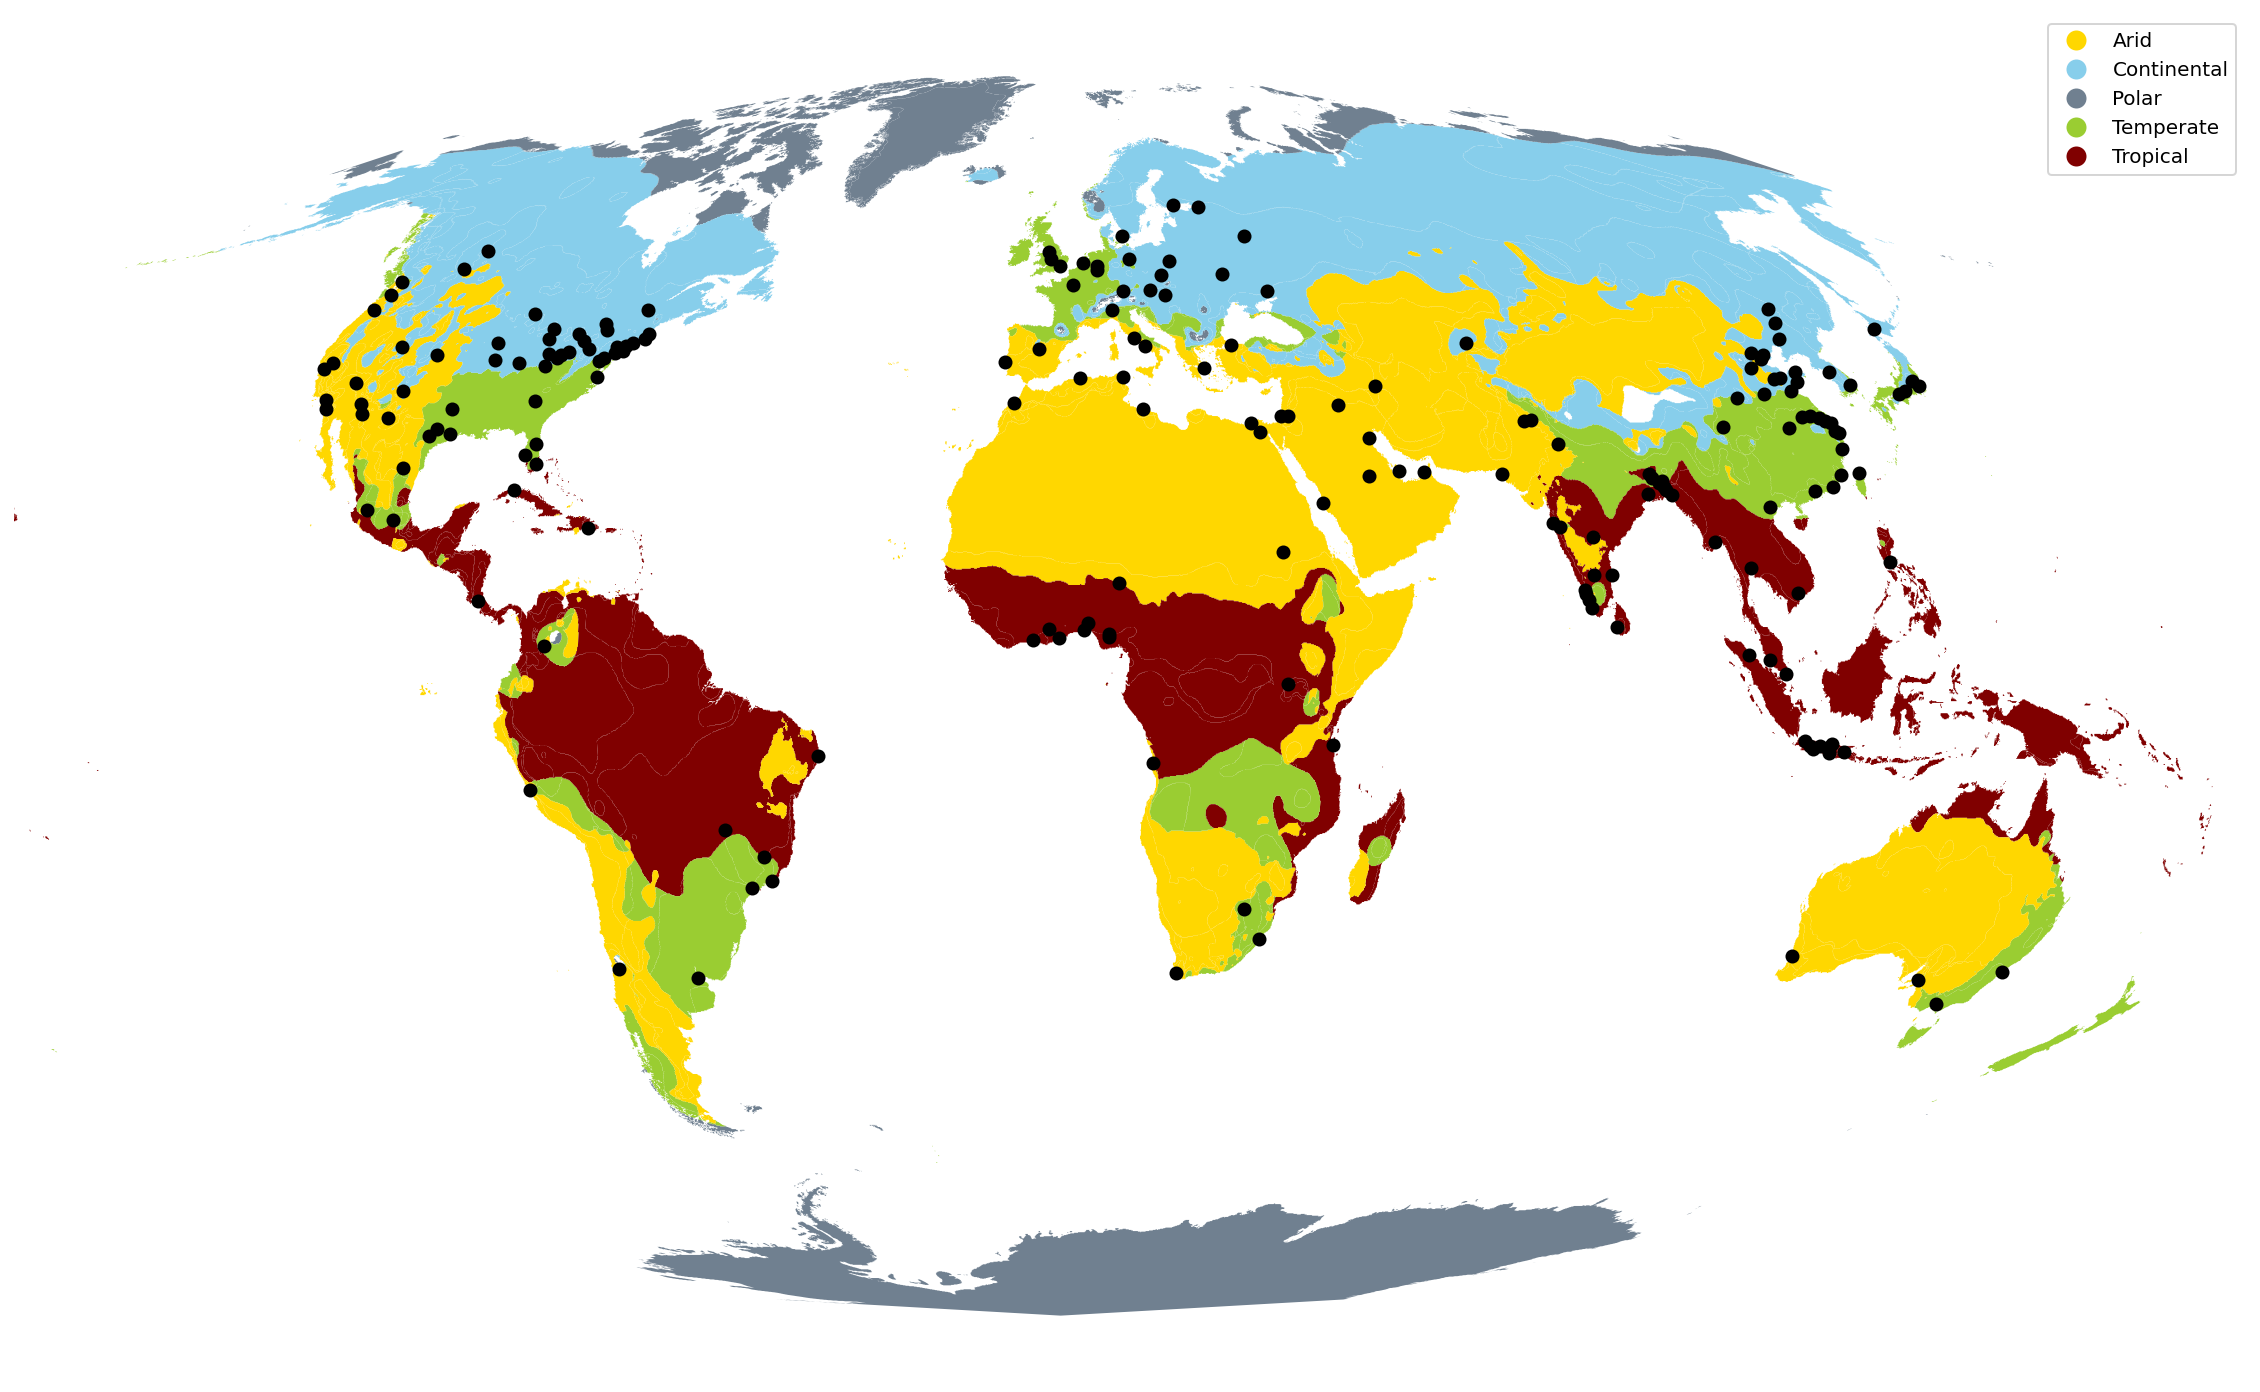

In [9]:
f,ax=plt.subplots(figsize=(20,20))
gdf_c.plot(column='climate',ax=ax,cmap=cmap, legend=True)
ax.scatter(dfc.x, dfc.y, color='black')
xlim([-1.5e7, 1.7e7])
ax.axis('off')

In [11]:
gdf_c.to_file('../data_revision/climate/kg.shp')

In [30]:
df_tresholds = pd.read_csv('../data_revision/df_tresholds.csv')

(-15000000.0, 17000000.0, -9908489.577010863, 9637228.459607832)

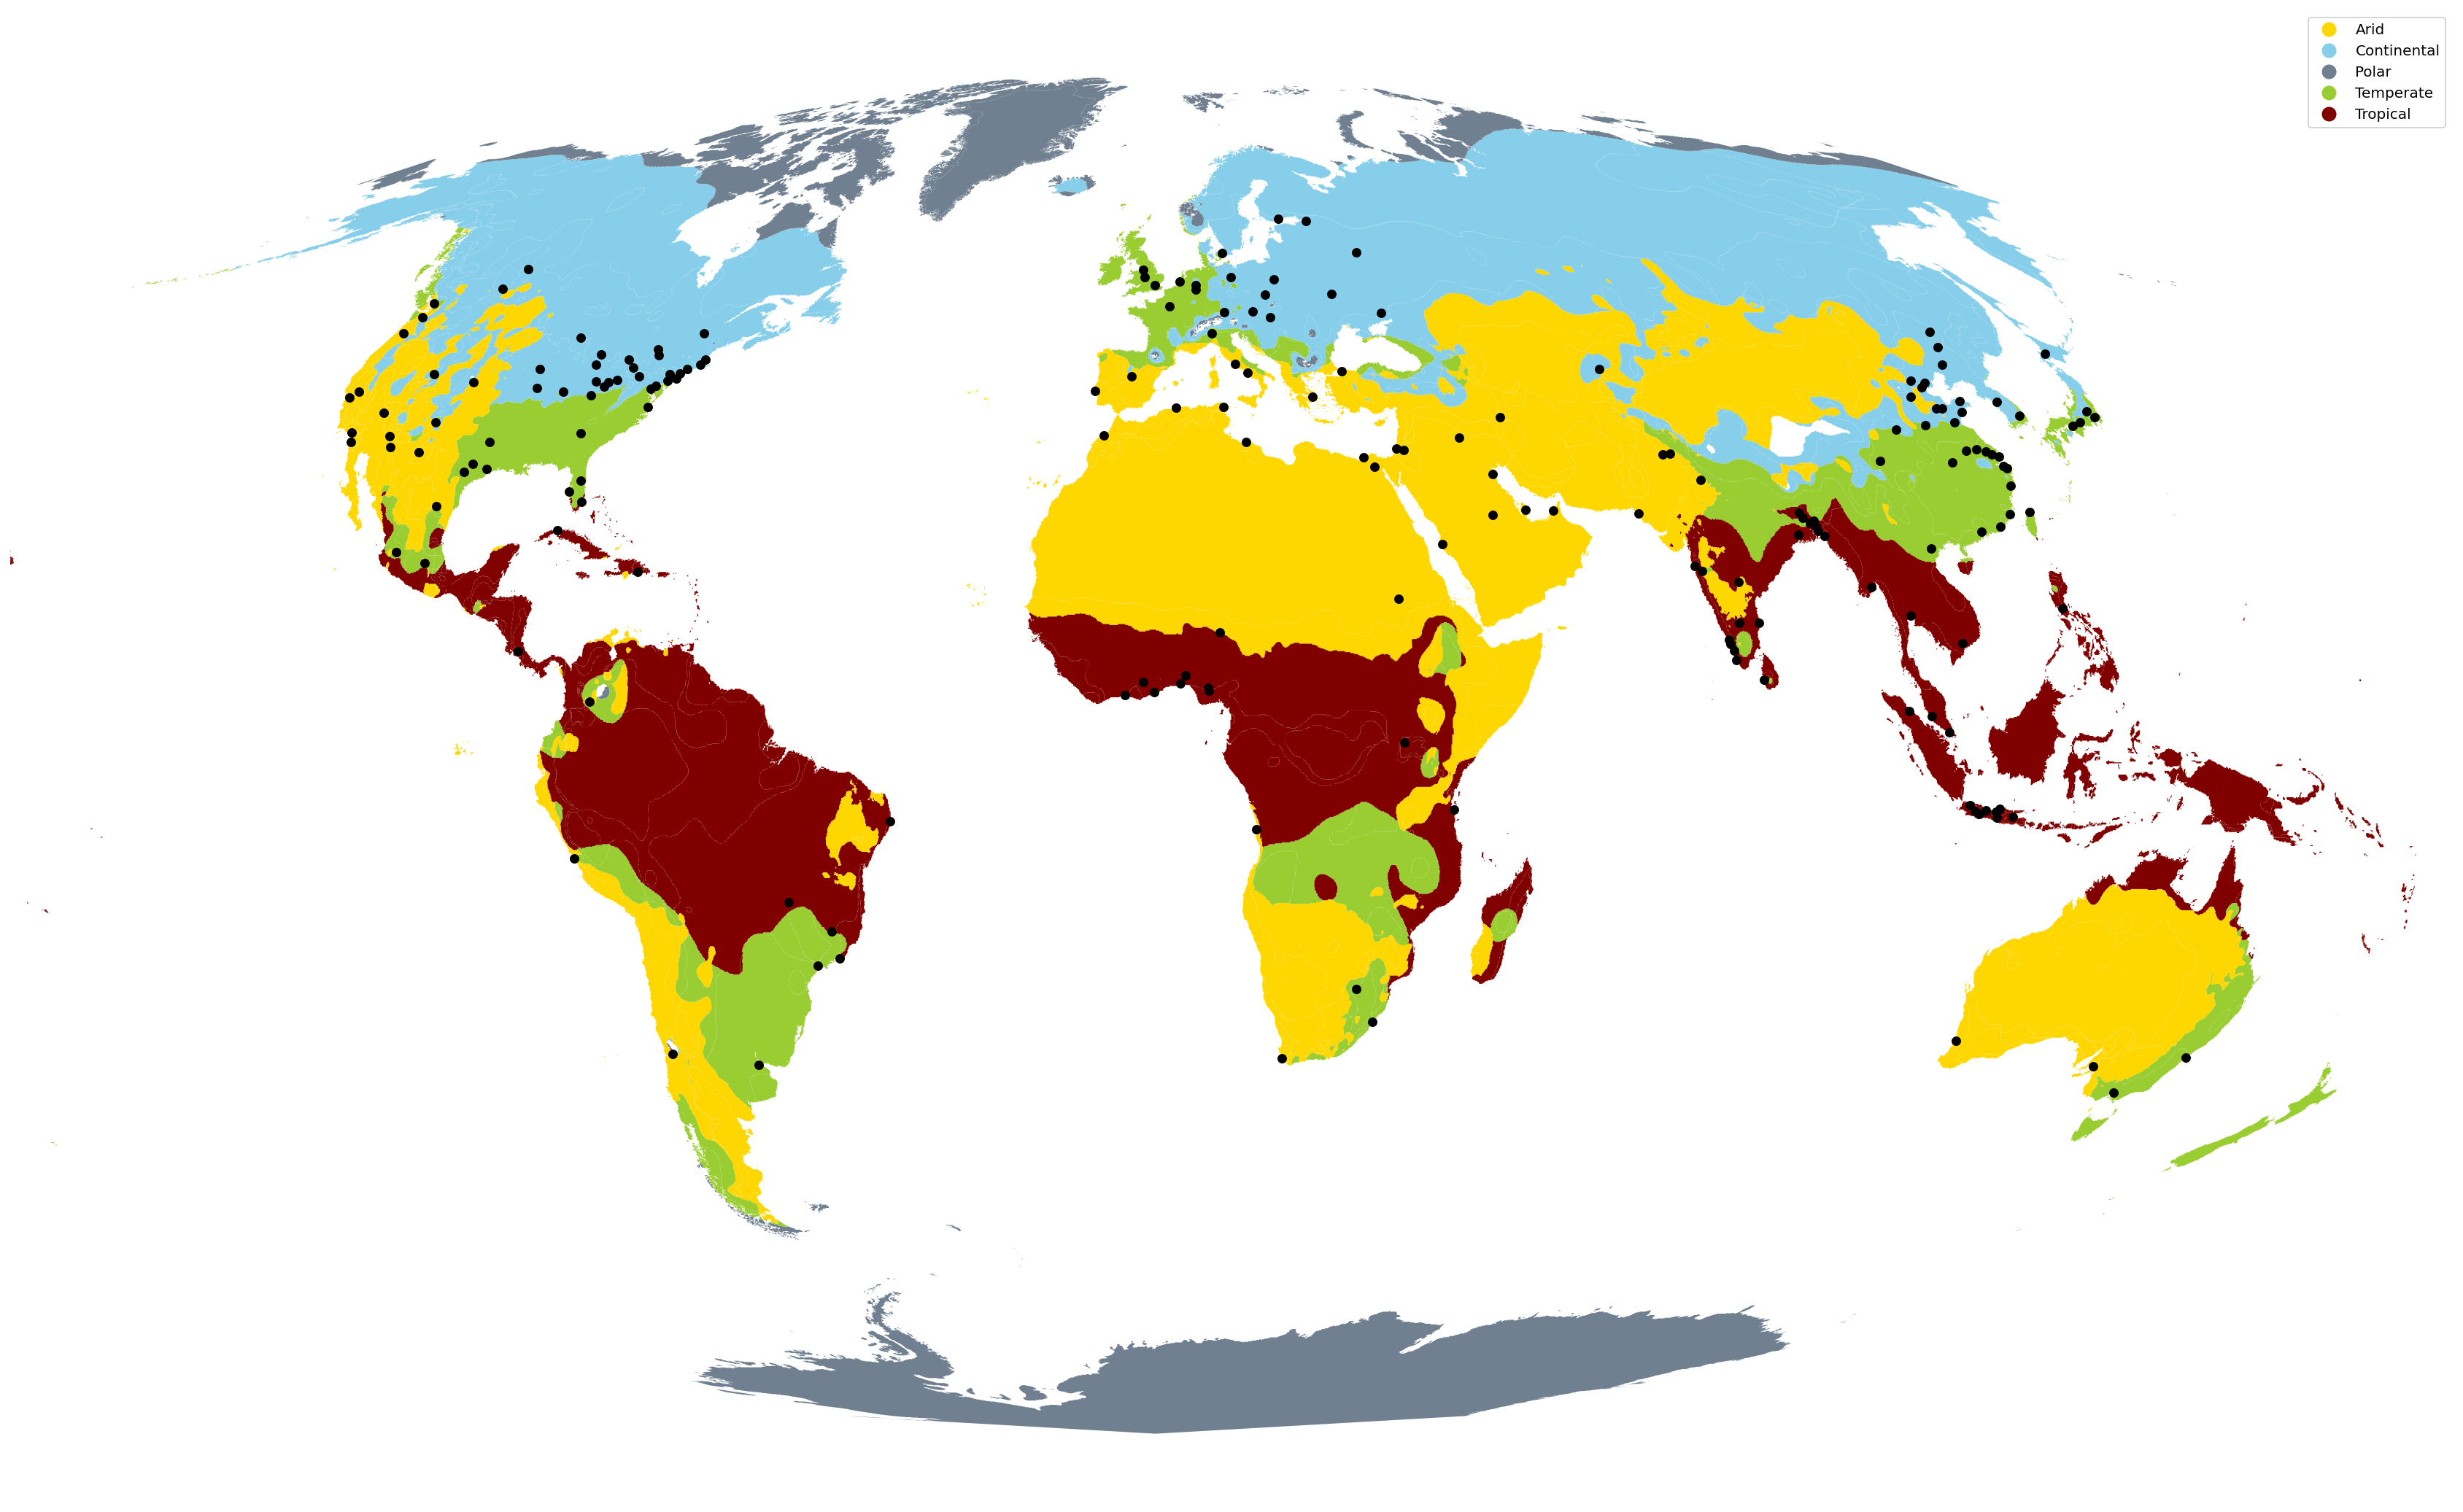

In [41]:
f,ax=plt.subplots(figsize=(30,30))
gdf_c.plot(column='climate',ax=ax,cmap=cmap, legend=True)
ax.scatter(dfc.x, dfc.y, color='black', s=30)
xlim([-1.5e7, 1.7e7])
ax.axis('off')

In [74]:
dfcc = dfc[['UC_NM_MN','tr_day', 'climate', 'tr_night']]
dfcc.head()

,UC_NM_MN,tr_day,climate,tr_night
0,Guangzhou,34.220668,Temperate,25.220641
1,Los Angeles,43.556653,Arid,19.557617
2,New York,32.553392,Continental,19.593585
3,Tokyo,35.562159,Temperate,22.314904
4,Jakarta,34.313226,Tropical,22.843520


In [75]:
df_col = pd.DataFrame(columns=['climate', 'color'])
df_col['climate'] = ["Arid","Continental","Polar","Temperate","Tropical"]
df_col['color'] = ['gold','skyblue','slategrey','yellowgreen','maroon']
dfcc = pd.merge(dfcc, df_col, on='climate').sort_values(['tr_day']).reset_index()
dfcc.head()

,index,UC_NM_MN,tr_day,climate,tr_night,color
0,53,Seattle,22.302252,Arid,12.812210,gold
1,15,Melbourne,23.065240,Temperate,9.845555,yellowgreen
2,147,Helsinki,23.699972,Continental,12.795786,skyblue
3,10,Buenos Aires,24.155753,Temperate,13.297781,yellowgreen
4,35,Manchester,24.908268,Temperate,11.296777,yellowgreen


<AxesSubplot:xlabel='UC_NM_MN'>

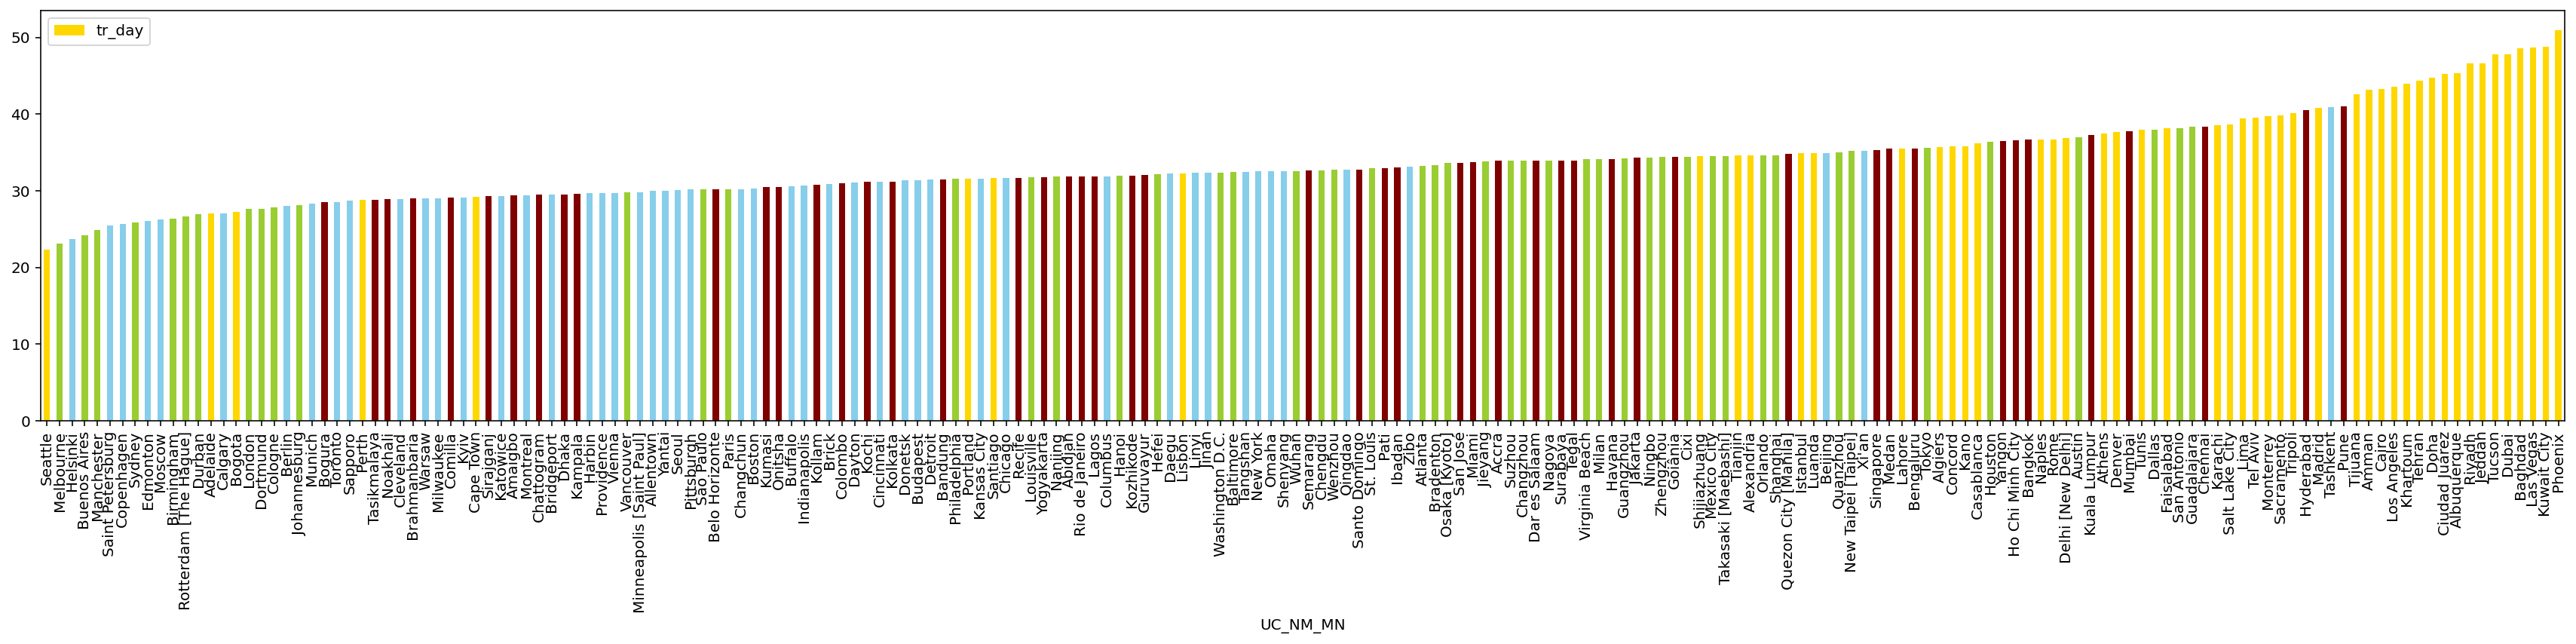

In [79]:
f,ax=plt.subplots(figsize=(30, 5))
dfcc.plot.bar(x='UC_NM_MN', y='tr_day', color=dfcc['color'],ax=ax)

In [87]:
dfp = dfc[['UC_NM_MN','tr_day', 'climate', 'tr_night', 'x', 'y']]

In [116]:
gdfp = gpd.GeoDataFrame(dfp, geometry=gpd.points_from_xy(dfp.x, dfp.y))
gdfp['tr_day_n']= (gdfp['tr_day'] - min(gdfp['tr_day'])) / (max(gdfp['tr_day']) - min(gdfp['tr_day']))

(-15000000.0, 17000000.0, -9908489.577010863, 9637228.459607832)

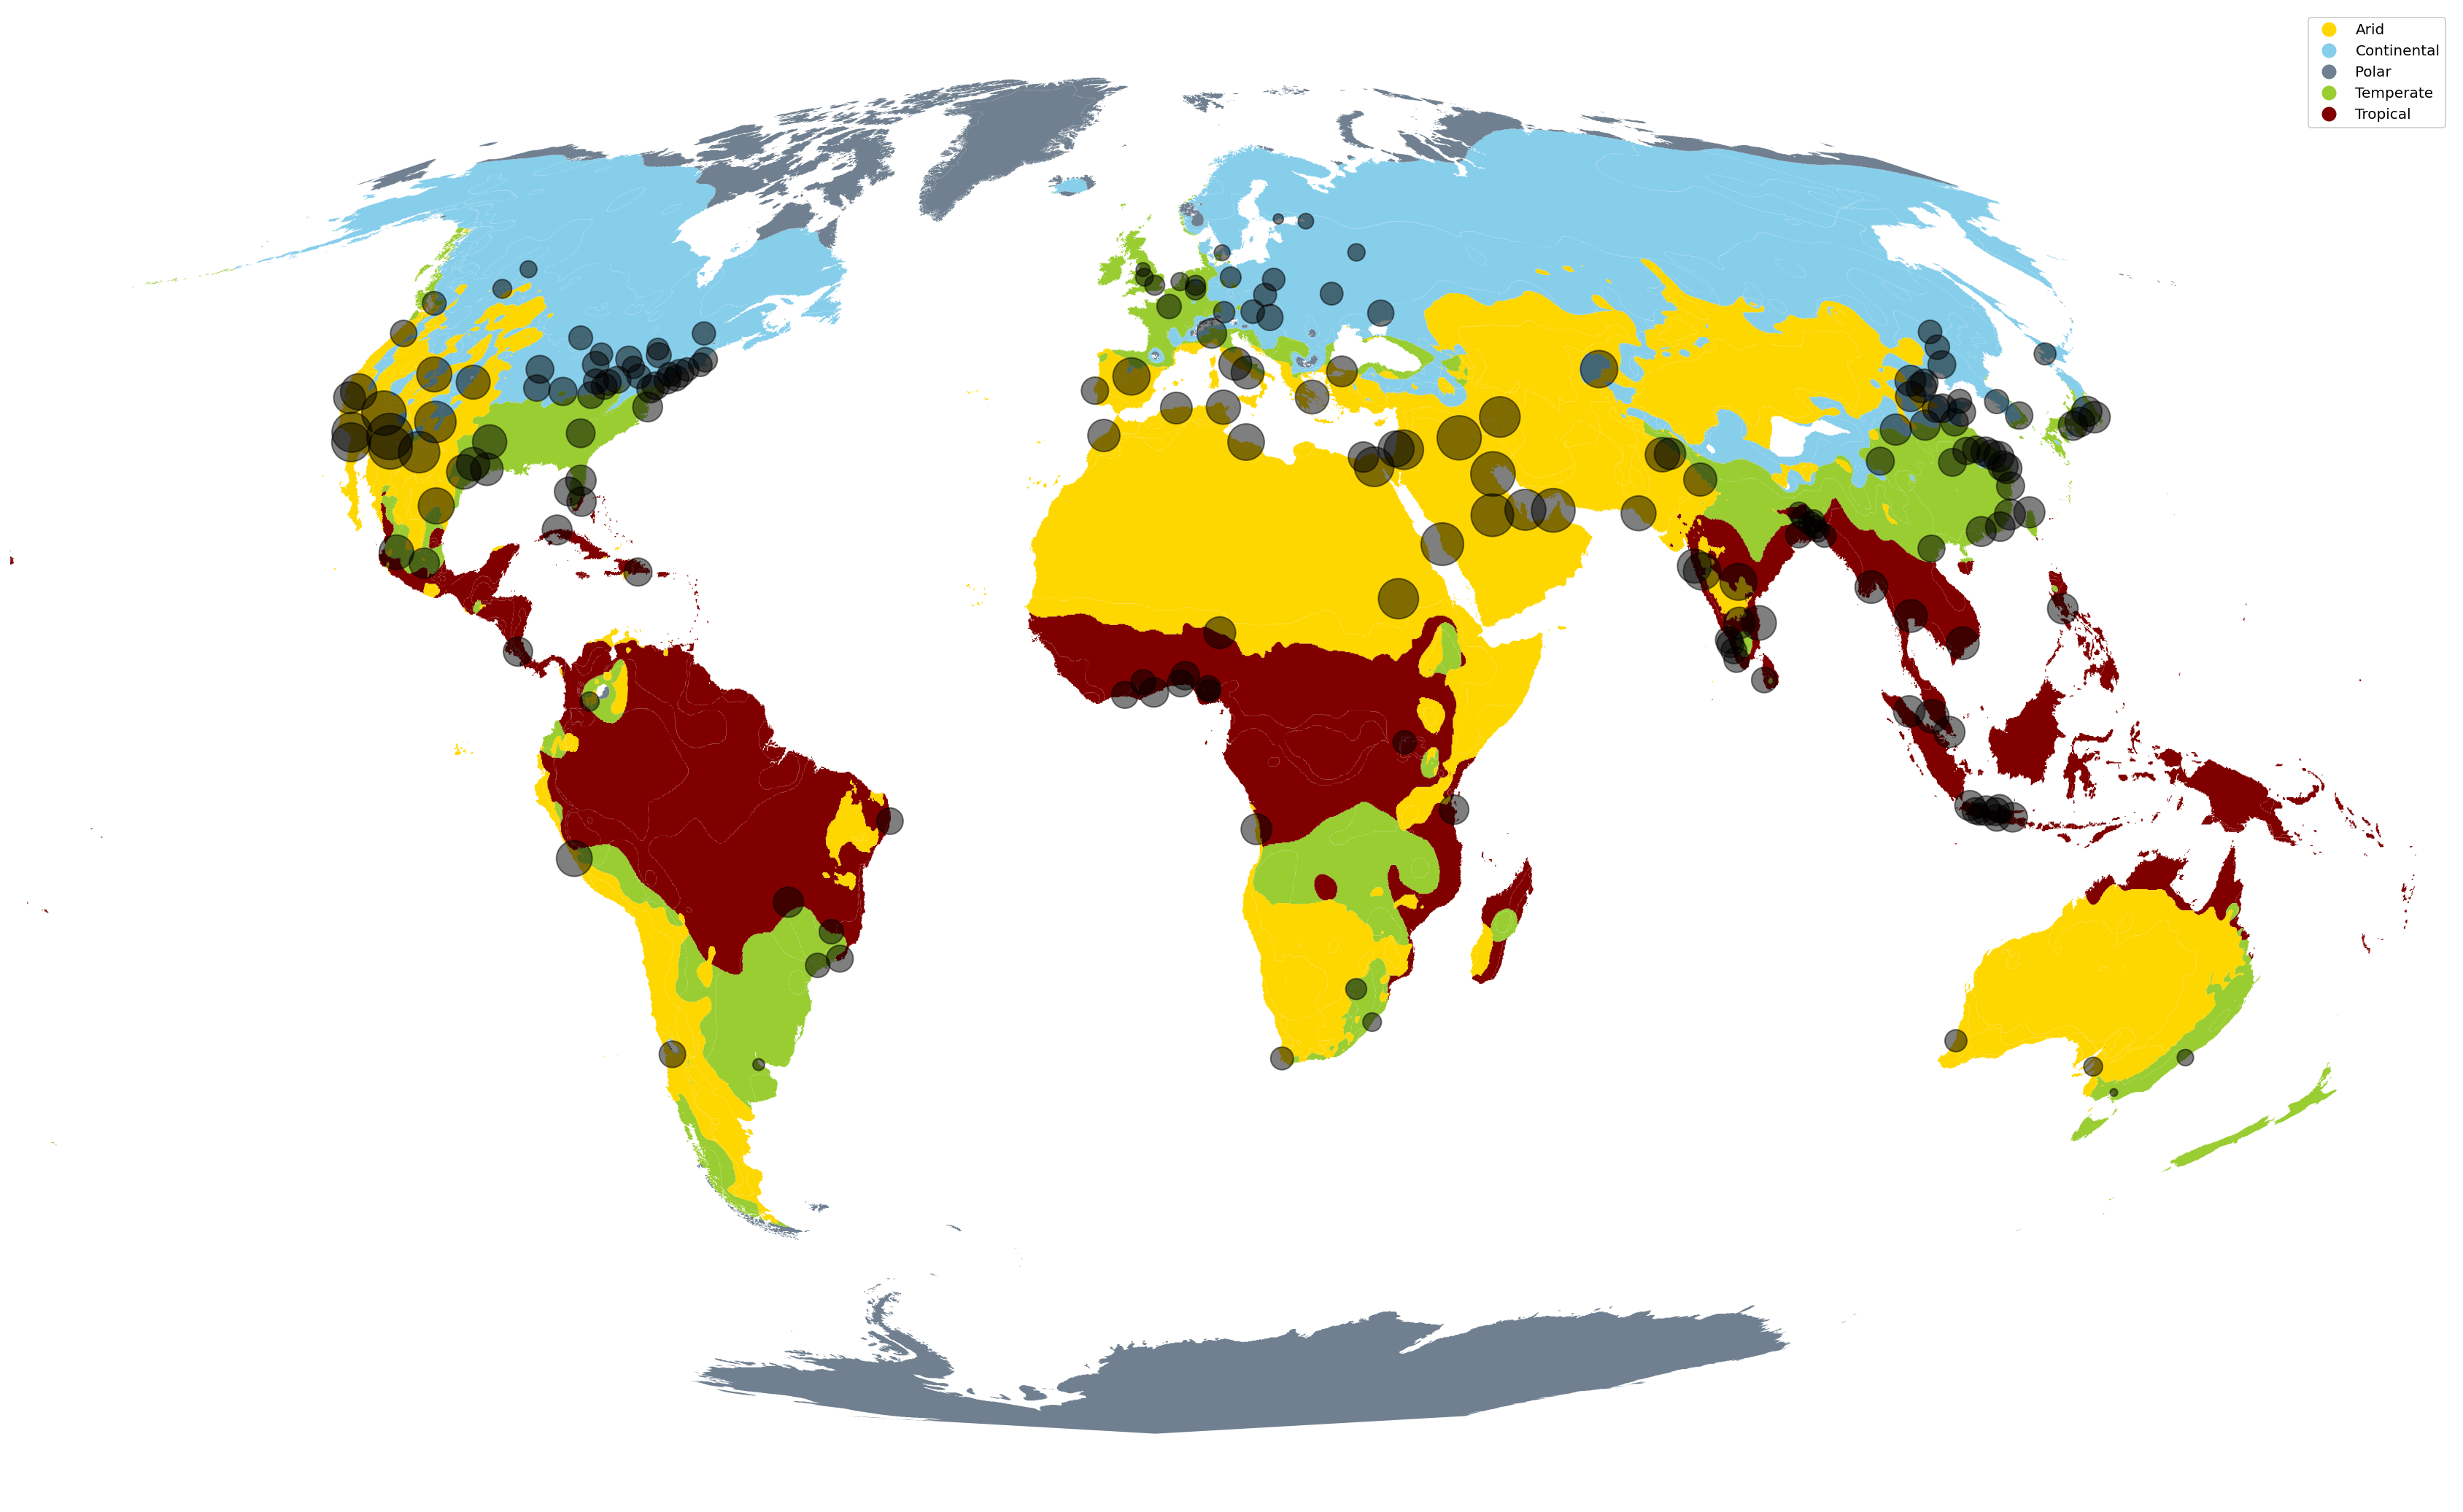

In [140]:
f,ax=plt.subplots(figsize=(30,30))
gdf_c.plot(column='climate',ax=ax,cmap=cmap, legend=True)
#gdfp.plot(column='tr_day_n', ax=ax, color='black')
ax.scatter(gdfp.x, gdfp.y, s=gdfp['tr_day_n']*10e2, color='black', alpha=.5)
xlim([-1.5e7, 1.7e7])
ax.axis('off')

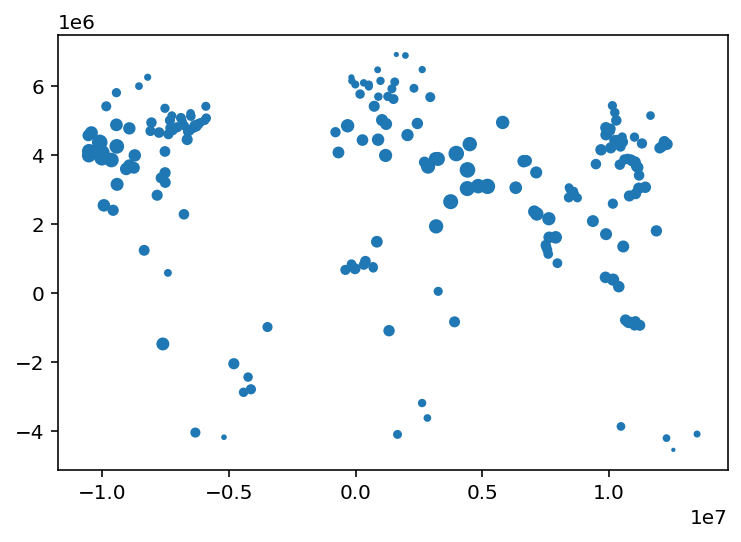

In [132]:
plt.scatter(gdfp.x, gdfp.y, s=gdfp['tr_day_n']*5e1)

In [125]:
0.1**.1

0.7943282347242815

In [129]:
0.9e10

9000000000.0

In [53]:
gdfCities.head()

,UC_NM_MN,climate,idx
0,Guangzhou,Temperate,0
1,Los Angeles,Arid,1
2,New York,Continental,2
3,Tokyo,Temperate,3
4,Jakarta,Tropical,4


In [54]:
gdf['idx']=gdf.index

In [55]:
gdfFinal = gdf.merge(gdfCities,on='idx')

In [56]:
gdfFinal['pdens']=gdfFinal['AREA']/gdf['P15']

In [57]:
gdfFinal

,AREA,geometry,UC_NM_MN_x,E_KG_NM_LST,P15,idx,UC_NM_MN_y,climate,pdens
0,6622.0,"MULTIPOLYGON (((10775000.000 2860000.000, 1077...",Guangzhou,"Mild temperate with dry winter, and Hot summer",4.058988e+07,0,Guangzhou,Temperate,0.000163
1,5633.0,"MULTIPOLYGON (((-10548000.000 4146000.000, -10...",Los Angeles,"Steppe (semi-arid), and Cold arid",1.428172e+07,1,Los Angeles,Arid,0.000394
2,5384.0,"MULTIPOLYGON (((-6217000.000 4920000.000, -621...",New York,"Mild temperate, fully humid, and Hot summer",1.595067e+07,2,New York,Continental,0.000338
3,5318.0,"MULTIPOLYGON (((12228000.000 4359000.000, 1223...",Tokyo,"Mild temperate, fully humid, and Hot summer",3.302873e+07,3,Tokyo,Temperate,0.000161
4,5009.0,"MULTIPOLYGON (((10654000.000 -743000.000, 1065...",Jakarta,Tropical rain forest,3.631254e+07,4,Jakarta,Tropical,0.000138
...,...,...,...,...,...,...,...,...,...
12702,1.0,"MULTIPOLYGON (((6522000.000 3011000.000, 65230...",Nindo Shahr,"Desert (arid), and Hot arid",6.723361e+04,13130,Nindo Shahr,Arid,0.000014
12703,1.0,"MULTIPOLYGON (((4066000.000 1112000.000, 40670...",Kuni,"Mild temperate with dry winter, and Warm summer",1.965145e+05,13131,Kuni,Tropical,0.000013
12704,1.0,"MULTIPOLYGON (((4067000.000 856000.000, 406800...",N/A,Tropical savannah with dry winter,5.129267e+04,13132,N/A,Arid,0.000015
12705,1.0,"MULTIPOLYGON (((3306000.000 840000.000, 330700...",Pibor,"Steppe (semi-arid), and Hot arid",1.865511e+05,13133,Pibor,Tropical,0.000019


In [58]:
gdfFinalClima = gdfFinal[['climate','idx']]
gdfFinalClima

,climate,idx
0,Temperate,0
1,Arid,1
2,Continental,2
3,Temperate,3
4,Tropical,4
...,...,...
12702,Arid,13130
12703,Tropical,13131
12704,Arid,13132
12705,Tropical,13133


In [59]:
gdfFinalClima.to_csv(dPath+'allCitiesClimate.csv',index=None)